### Importing Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
print(sns.__version__)

0.12.2


In [3]:
df = pd.read_csv('./dataset/ASII.JK.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-05,8400.0,8475.0,8250.0,8325.0,6583.352051,28909900.0
1,2018-12-06,8200.0,8250.0,8050.0,8100.0,6405.423340,55894200.0
2,2018-12-07,8100.0,8275.0,8075.0,8225.0,6504.271484,58677800.0
3,2018-12-10,8075.0,8175.0,8050.0,8150.0,6444.961914,23912000.0
4,2018-12-11,8150.0,8250.0,8150.0,8150.0,6444.961914,34673200.0


In [4]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2023-11-28,5675.0,5675.0,5550.0,5550.0,5550.0,86907600.0
1230,2023-11-29,5600.0,5650.0,5525.0,5525.0,5525.0,75070800.0
1231,2023-11-30,5575.0,5575.0,5400.0,5400.0,5400.0,161684600.0
1232,2023-12-01,5450.0,5750.0,5450.0,5750.0,5750.0,145374400.0
1233,2023-12-04,5750.0,5825.0,5725.0,5750.0,5750.0,57590700.0


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,6152.745337,6223.033252,6068.824006,6143.552311,5296.229402,4.410462e+07
std,964.483970,961.991161,964.353374,966.105677,844.282815,2.810169e+07
min,3220.000000,3610.000000,3220.000000,3280.000000,2672.494873,0.000000e+00
25%,5525.000000,5600.000000,5450.000000,5500.000000,4728.586914,2.723510e+07
50%,6175.000000,6250.000000,6075.000000,6150.000000,5386.582520,3.696070e+07
75%,6800.000000,6875.000000,6725.000000,6800.000000,5936.489258,5.350540e+07
max,8500.000000,8625.000000,8425.000000,8475.000000,6812.826660,3.114024e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1233 non-null   float64
 2   High       1233 non-null   float64
 3   Low        1233 non-null   float64
 4   Close      1233 non-null   float64
 5   Adj Close  1233 non-null   float64
 6   Volume     1233 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [7]:
df.shape

(1234, 7)

In [8]:
df.max()


Date          2023-12-04
Open              8500.0
High              8625.0
Low               8425.0
Close             8475.0
Adj Close     6812.82666
Volume       311402400.0
dtype: object

In [9]:
df.min()

Date          2018-12-05
Open              3220.0
High              3610.0
Low               3220.0
Close             3280.0
Adj Close    2672.494873
Volume               0.0
dtype: object

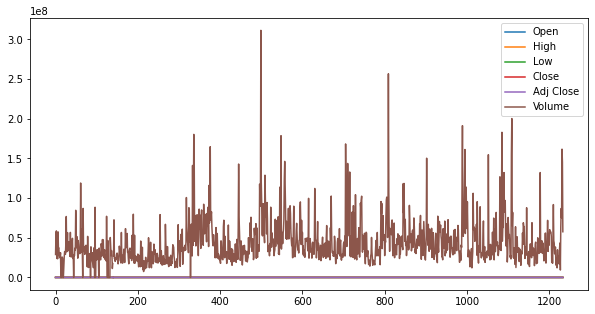

In [10]:
df.plot(figsize=(10,5))
plt.show()

### Data preprocessing

In [11]:
df = pd.read_csv('./dataset/ASII.JK.csv', index_col=['Date'], parse_dates=['Date'])
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-05,8400.0,8475.0,8250.0,8325.0,6583.352051,28909900.0
2018-12-06,8200.0,8250.0,8050.0,8100.0,6405.423340,55894200.0
2018-12-07,8100.0,8275.0,8075.0,8225.0,6504.271484,58677800.0
2018-12-10,8075.0,8175.0,8050.0,8150.0,6444.961914,23912000.0
2018-12-11,8150.0,8250.0,8150.0,8150.0,6444.961914,34673200.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2018-12-05 to 2023-12-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1233 non-null   float64
 1   High       1233 non-null   float64
 2   Low        1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Adj Close  1233 non-null   float64
 5   Volume     1233 non-null   float64
dtypes: float64(6)
memory usage: 67.5 KB


In [13]:
df.isnull().sum()


Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [14]:
asii = df.drop(['Open', 'High', 'Low','Adj Close','Volume'], axis=1)
asii

,Close
Date,
2018-12-05,8325.0
2018-12-06,8100.0
2018-12-07,8225.0
2018-12-10,8150.0
2018-12-11,8150.0
...,...
2023-11-28,5550.0
2023-11-29,5525.0
2023-11-30,5400.0


In [15]:
# asii = df.fillna(df.mean())

asii['Close'].fillna((asii['Close'].mean()), inplace=True) 
asii.head(10)

,Close
Date,
2018-12-05,8325.0
2018-12-06,8100.0
2018-12-07,8225.0
2018-12-10,8150.0
2018-12-11,8150.0
2018-12-12,8250.0
2018-12-13,8450.0
2018-12-14,8450.0
2018-12-17,8300.0


In [16]:
asii.isnull().sum()

Close    0
dtype: int64

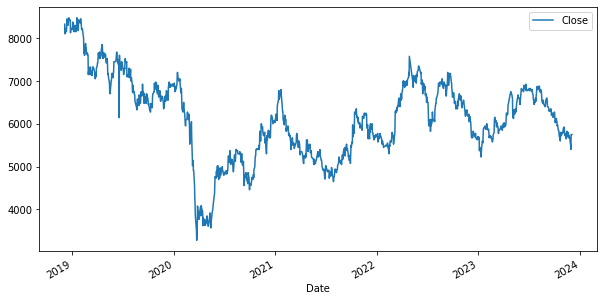

In [17]:
asii.plot(figsize=(10,5))
plt.show()

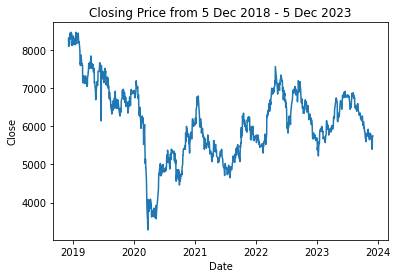

In [18]:
#selecting close price as features and try to plotting

sns.lineplot(data=asii, x="Date", y="Close")
plt.title("Closing Price from 5 Dec 2018 - 5 Dec 2023")
plt.show()

<Axes: >

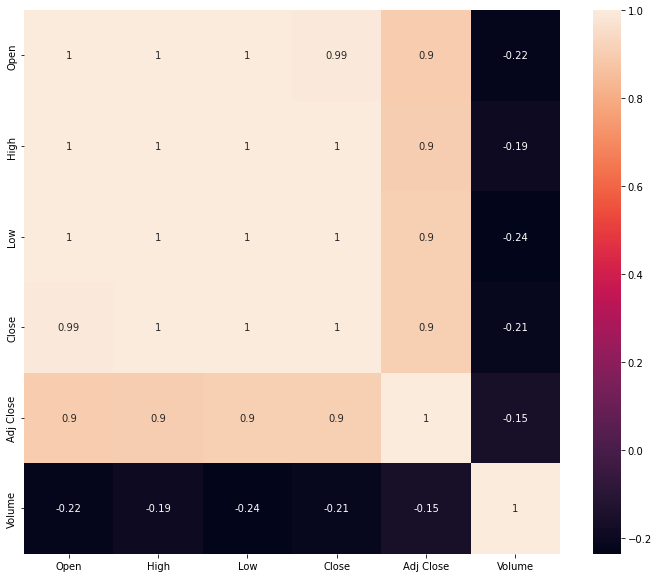

In [19]:
correlation = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True)

#### Stationary Test 🚄

1. ADF Statistic: -2.83697817355688
2. p-value: 0.05318274786112874
3. lags:  6
4. number of observations:  1227
5. Critical values: 
	1%: -3.435690695421723
	5%: -2.863898416697677
	10%: -2.5680256555204184
Failed to reject H0 - Time series is Non-Stationary


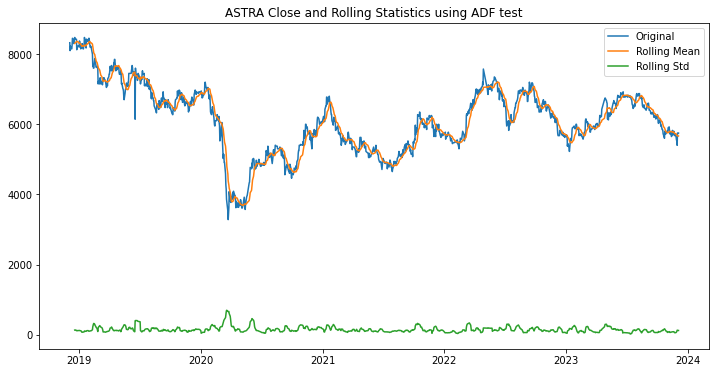

In [20]:
# Using Dickey-Fuller test
result = adfuller(asii['Close'])
print("1. ADF Statistic:", result[0])
print("2. p-value:", result[1])
print("3. lags: ", result[2])
print("4. number of observations: ", result[3])
print("5. Critical values: ")
for key, value in result[4].items():
        print("\t{}: {}".format(key, value))
if result[0] < result [4]["5%"]:
    print("Reject H0- Time series is Stationary")
else:
    print("Failed to reject H0 - Time series is Non-Stationary")

# plot rolling mean and standard deviation
rolling_mean = asii['Close'].rolling(window=12).mean()
rolling_std = asii['Close'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(asii['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc = 'best')
plt.title('ASTRA Close and Rolling Statistics using ADF test')
plt.show()

### Handling Stationarity

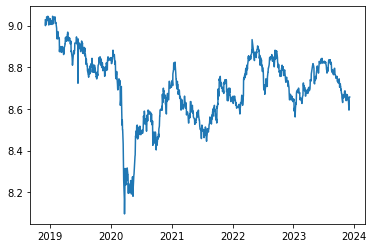

In [21]:
# 1.Log Transformation

asii_log = np.log(asii)
asii_log = asii_log.dropna()
plt.plot(asii_log)

In [22]:
# ADF 2nd test
def stationary(timeseries):

    # Membuat plot grafik rolling mean and standard deviation
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    #plot figure
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='orange', label='Rolling Mean')
    plt.plot(rolling_std, color='red', label='Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Astra Close and Rolling Statistics')
    plt.show()

    # Menggunakan teknik Dickey-Fuller test
    result = adfuller(timeseries['Close'])
    print("ADF Statistic: {}".format(result[0]))
    print("p-value:".format(result[1]))
    print("Critical values : ")
    for key, value in result[4].items():
        print("\t{}: {}".format(key, value))
    if result[0] < result [4]["5%"]:
        print("Reject H0- Time series is Stationary")
    else:
        print("Failed to reject H0 - Time series is Non-Stationary")


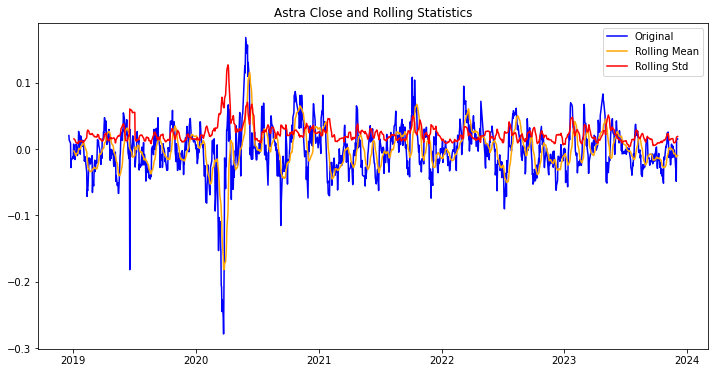

ADF Statistic: -6.7971175405812
p-value:
Critical values : 
	1%: -3.435770379276604
	5%: -2.8639335727551223
	10%: -2.5680443783356286
Reject H0- Time series is Stationary


In [23]:
# 2. Calculate and subtract a moving average smoothing
rolling_mean = asii_log.rolling(window=12).mean()
stationary_data_mean = asii_log - rolling_mean
stationary_data_mean.dropna(inplace=True)

stationary(stationary_data_mean)

### ACF & PACF

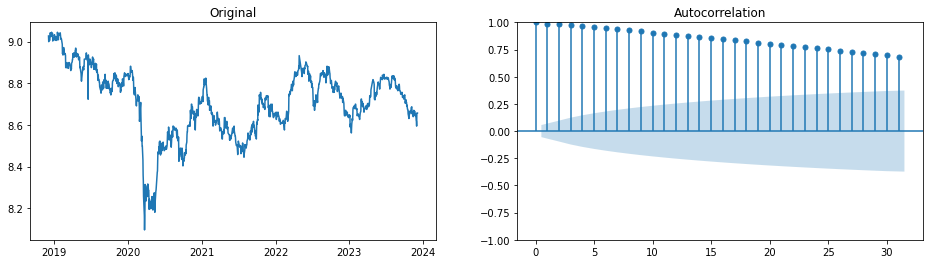

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(asii_log.Close)
ax1.set_title('Original')
plot_acf(asii_log.Close, ax=ax2);

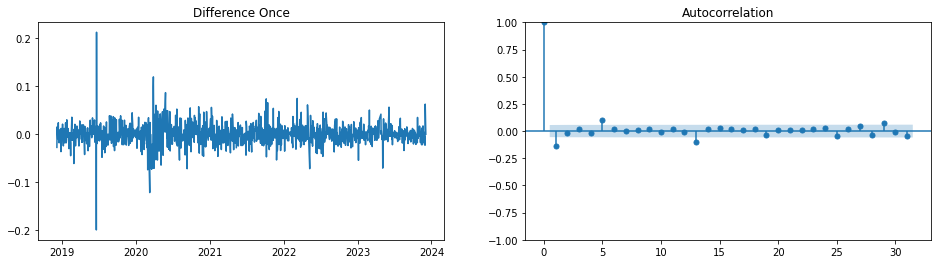

In [60]:
#3. Differencing

diff = asii_log.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);


In [52]:
from pmdarima.arima.utils import ndiffs

In [69]:
import pmdarima as pm

print(pm.__version__)

2.0.3


In [61]:
ndiffs(asii_log.Close, test="adf")

1

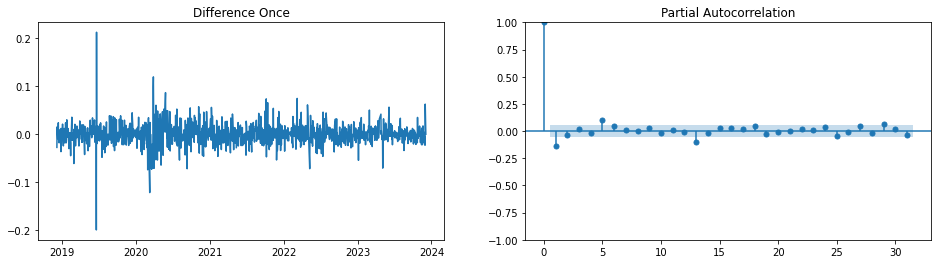

In [62]:
diff = asii_log.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
from sklearn.model_selection import train_test_split

In [207]:
# n = int(len(asii) * 0.8)
# train = asii.Close[:n]
# test = asii.Close[n:]

In [208]:
print(train.shape, test.shape)

(987,) (247,)


In [292]:
print(asii.shape)
train = asii.iloc[:987]
test = asii.iloc[986:]
print(train.shape, test.shape)

# print(asii.shape)
# train = asii.iloc[:-46]
# test = asii.iloc[-45:]
# print(train.shape, test.shape)

(1234, 1)
(987, 1) (248, 1)


In [293]:
model= ARIMA(train, order=(5,1,5))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  987
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -6232.320
Date:                Wed, 06 Dec 2023   AIC                          12486.641
Time:                        21:06:12   BIC                          12540.471
Sample:                             0   HQIC                         12507.114
                                - 987                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5422      2.876      0.189      0.850      -5.094       6.179
ar.L2         -0.2044      1.197     -0.171      0.864      -2.551       2.142
ar.L3          0.7129      0.501      1.424      0.155      -0.269       1.694
ar.L4         -0.5868      1.971     -0.298      0.766      -4.451       3.277
ar.L5          0.0334      1.414      0.024      0.981      -2.737       2.804
ma.L1         -0.7549      2.877     -0.262      0.793      -6.394       4.884
ma.L2          0.3295      1.790      0.184      0.854      -3.178       3.837
ma.L3         -0.7645      0.752     -1.017      0.309      -2.238       0.709
ma.L4          0.7417      2.084      0.356      0.722      -3.343       4.827
ma.L5         -0.0681      1.818     -0.037      0.970      -3.631       3.495
sigma2      1.833e+04    427.756     42.852      0.000    1.75e+04    1.92e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9470.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [294]:
start=len(train)
end = len(train) + len(test) - 1

# Use the 'forecast()' method to make predictions
pred = results.forecast(steps=len(test))

# 'pred' contains the point forecasts
print(pred)

987     6173.255825
988     6183.727562
989     6178.750339
990     6175.893792
991     6184.113925
           ...     
1230    6179.277504
1231    6179.277508
1232    6179.277518
1233    6179.277505
1234    6179.277508
Name: predicted_mean, Length: 248, dtype: float64


In [295]:
start_date = '2023-11-29'
end_date = '2023-12-29'  
future_dates = pd.date_range(start=start_date, end=end_date)

In [296]:
future_pred = results.forecast(steps=len(future_dates))

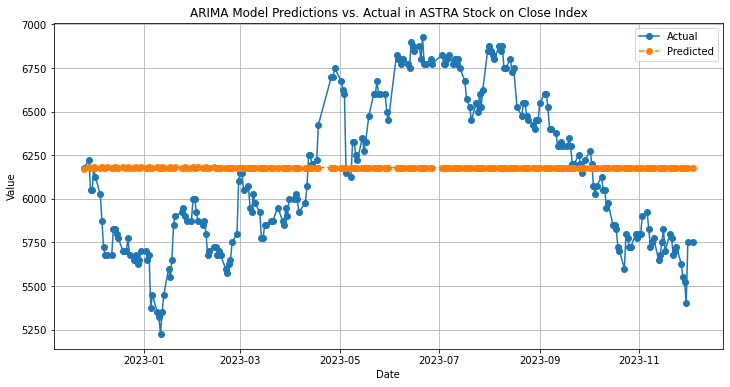

In [297]:
import matplotlib.pyplot as plt

# Assuming you have the actual values in 'test' and 'pred' contains the point forecasts
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, pred, label='Predicted', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions vs. Actual in ASTRA Stock on Close Index')
plt.legend()
plt.grid(True)
plt.show()


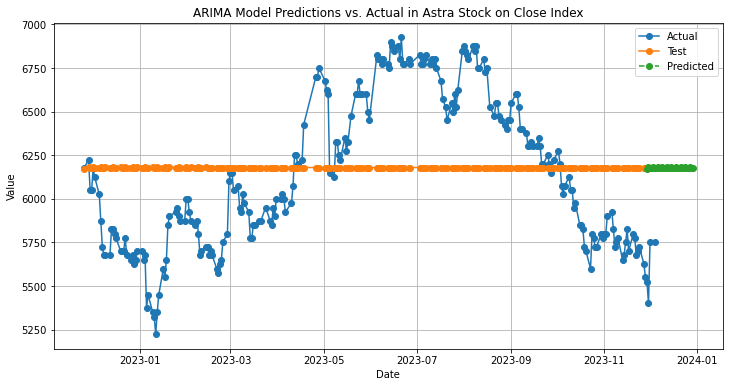

In [299]:
import matplotlib.pyplot as plt

# plotting hasil tambahan apabila digabungan dengan predicted
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, pred, label='Test', marker='o')
plt.plot(future_dates, future_pred, label='Predicted', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions vs. Actual in Astra Stock on Close Index')
plt.legend()
plt.grid(True)
plt.show()